In [11]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from config import cache_path, save_path
from pathlib import Path
import numpy as np

In [164]:
boc = BrainObservatoryCache(manifest_file=str(
            Path(cache_path) / 'brain_observatory_manifest.json'))

eid=501559087
#eid=564425777

data_dct={}

data_set = boc.get_ophys_experiment_data(eid)

data_dct['movie_stim_table'] = data_set.get_stimulus_table(
                'natural_movie_one')

data_dct['neural_responses'] = data_set.get_dff_traces()[1]

In [145]:
data_dct['neural_responses'].shape

(274, 115721)

In [143]:
data_dct['movie_stim_table']

,frame,start,end,repeat
0,0,38749,38750,0
1,1,38750,38751,0
2,2,38751,38752,0
3,3,38752,38753,0
4,4,38753,38754,0
...,...,...,...,...
8995,895,47795,47795,9
8996,896,47796,47796,9
8997,897,47797,47797,9
8998,898,47798,47798,9


In [141]:
data_dct['neural_responses'][:,38749:(38749+900)]
#X=dff[1][:,38749:(38749+900)]

array([[ 4.1375391e-02,  1.8582508e-02,  7.5950958e-02, ...,
         3.9312635e-02, -3.0153748e-02,  4.7325236e-03],
       [ 1.4622192e-01,  6.7504428e-02, -1.4544210e-02, ...,
         1.8862096e+00,  1.6689435e+00,  1.7145643e+00],
       [-2.6581520e-02, -9.7623924e-05, -6.5292567e-02, ...,
        -5.2210122e-02, -5.1503856e-02,  8.1780646e-03],
       ...,
       [-3.0112842e-02, -5.1095508e-02, -1.9610340e-02, ...,
        -3.0313572e-02,  5.7511050e-02, -8.6430162e-02],
       [-1.3270264e-02,  1.1683735e-02, -7.0314378e-02, ...,
         5.6903075e-02, -8.9695221e-03, -2.8303338e-02],
       [ 4.4263583e-02,  3.8264357e-02, -2.8717842e-02, ...,
        -4.9459547e-02, -3.5502523e-02, -2.5548382e-02]], dtype=float32)

In [67]:
# Download experiment containers for Cux2 experiments
#Pan-excitatory
import pprint
Emx1_exps = boc.get_experiment_containers(cre_lines=['Emx1-IRES-Cre'])
print("Emx1 experiments: %d\n" % len(Emx1_exps))

print("Example experiment container record:")
pprint.pprint(Emx1_exps[0])

# Find all of the experiments for an experiment container
Emx1_id = Emx1_exps[0]['id']
exps = boc.get_ophys_experiments(experiment_container_ids=[Emx1_id])
print("Experiments for experiment_container_id %d: %d\n" % (Emx1_id, len(exps)))
pprint.pprint(exps)
exp=exps[1]
print(exp)

Emx1 experiments: 41

Example experiment container record:
{'cre_line': 'Emx1-IRES-Cre',
 'donor_name': '283147',
 'failed': False,
 'id': 564425775,
 'imaging_depth': 175,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
 'tags': [],
 'targeted_structure': 'VISl'}
Experiments for experiment_container_id 564425775: 3

[{'acquisition_age_days': 121,
  'cre_line': 'Emx1-IRES-Cre',
  'donor_name': '283147',
  'experiment_container_id': 564425775,
  'fail_eye_tracking': True,
  'id': 567734055,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_B',
  'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
  'targeted_structure': 'VISl'},
 {'acquisition_age_days': 106,
  'cre_line': 'Emx1-IRES-Cre',
  'donor_name': '283147',
  'experiment_container_id': 564425775,
  'fail_eye_tracking': True,
  'id': 564425777,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 't

In [165]:
embeddings=np.load(Path(save_path)/Path('natural_movie_one_dino.npy'))
#embeddings=np.load(Path(save_path)/Path('movie_one.npy'))
print(embeddings.shape)
embeddings=np.load('/home/maria/CalciumImaging/movie_one_dino.npy')
#embeddings=np.load(Path(save_path)/Path('natural_movie_one_clip.npy'))

(900, 768)


In [172]:
def make_regression_data(data_dct, embeddings):
        np.random.seed = 7879
        stimuli = data_dct['movie_stim_table'].loc[data_dct['movie_stim_table']['repeat'] == 9]
        print(stimuli)

        X_train, X_test, y_train_inds, y_test_inds = train_test_split(embeddings,stimuli['start'].values, test_size=0.2, random_state=42)
        y_train=data_dct['neural_responses'][:,y_train_inds]
        y_test=data_dct['neural_responses'][:,y_test_inds]

        return y_train, y_test, X_train, X_test

y_train_movie, y_test_movie, train_embedding,test_embedding = make_regression_data(data_dct, embeddings) 
print(y_train_movie.shape, y_test_movie.shape, train_embedding.shape, test_embedding.shape)

      frame  start    end  repeat
8100      0  78435  78436       9
8101      1  78436  78437       9
8102      2  78437  78438       9
8103      3  78438  78439       9
8104      4  78439  78440       9
...     ...    ...    ...     ...
8995    895  79333  79334       9
8996    896  79334  79335       9
8997    897  79335  79336       9
8998    898  79336  79337       9
8999    899  79337  79338       9

[900 rows x 4 columns]
(174, 720) (174, 180) (720, 768) (180, 768)


In [117]:
y_train_movie.shape

(720, 274)

In [173]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming train_embedding and test_embedding are your feature matrices
# and y_train_movie, y_test_movie are your target variables

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training features
train_embedding_scaled = scaler.fit_transform(train_embedding)

# Transform the test features using the same scaler
test_embedding_scaled = scaler.transform(test_embedding)


# Create a Linear Regression model
regr = LinearRegression()
regr=Ridge(10)

# Fit the model with scaled training features and target variable
regr.fit(train_embedding_scaled, y_train_movie.T)

# Make predictions on scaled test features
predictions = regr.predict(test_embedding_scaled)

# Calculate R-squared score
r2 = r2_score(y_test_movie.T, predictions)

print("R-squared score:", r2)

R-squared score: -0.03857131667597996


In [174]:
scores=[]
for i in range(0,174):
    scores.append(r2_score(y_test_movie.T[:,i], predictions[:,i]))
    print(r2_score(y_test_movie.T[:,i], predictions[:,i]))

0.815696927591456
0.5055532883179235
0.19429677035577042
0.4869881339269624
-0.144786564370462
-0.2473602995852182
-0.7452109407402805
-0.5750805861828725
-0.1907091626001307
0.3277002663891423
0.02831599935909701
-0.8294212290246439
-0.3506460798268125
-0.12390815893854379
-0.3140845031984183
-0.5784275521346876
-0.40191714932015765
-0.2273759929954442
-0.3119318524004364
-0.19855972536615574
-0.4926954951330418
-0.28918844718804326
-0.6709926787669507
0.7264554105740684
-0.1776101186030692
-0.2867638801615482
-0.5377181201626149
0.0539121522165934
-0.30513483591299506
-0.7179264140632857
-0.19658627884582125
0.556712066070727
0.42265906420661314
-0.2912805923749724
-0.2080577483899757
-0.5831616404198261
-0.39699879110821645
-0.06395655907212827
-0.3624336452176309
0.032797023759252864
-0.07924039853886189
-0.23385730905130164
0.35092023178066156
-0.16573387356045144
0.7572652879259125
0.01728528002115992
0.7463035946941232
0.038797273573237145
-0.49386793199014245
0.3186584254369622

(array([ 9., 24., 27., 37., 22.,  6., 11.,  7.,  9., 22.]),
 array([-0.8575961 , -0.67496505, -0.49233401, -0.30970297, -0.12707193,
         0.05555911,  0.23819016,  0.4208212 ,  0.60345224,  0.78608328,
         0.96871432]),
 <BarContainer object of 10 artists>)

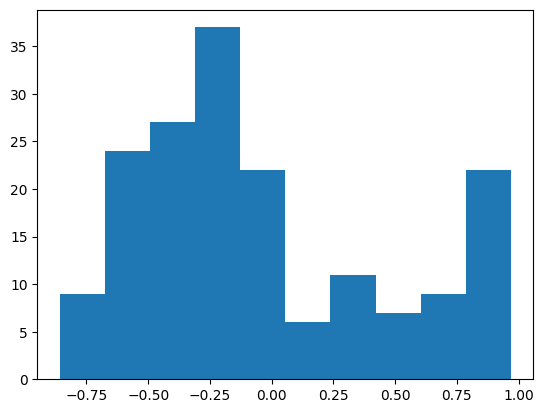

In [175]:
import matplotlib.pyplot as plt


plt.hist(scores)

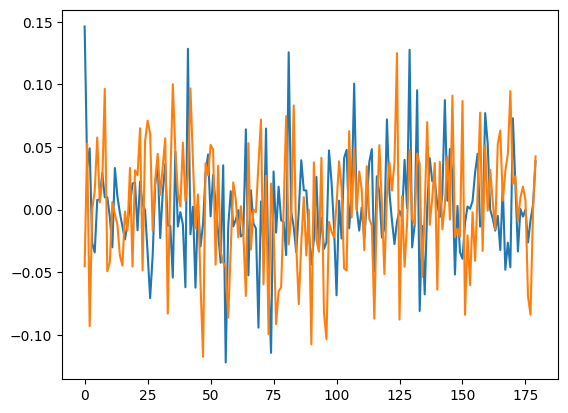

In [138]:
plt.plot(predictions[:,5])
plt.plot(y_test_movie[:,5])

In [137]:
predictions.shape

(180, 274)

In [64]:
regr.coef_.shape

(174, 768)